In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors


In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/bethlhem/Desktop/2019.csv") #we load our dataset
a =data.head(15) #top 15 on the list
b =data.tail(15) #bottom 15 on the lis
a 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
b

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
145,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077


<BarContainer object of 15 artists>

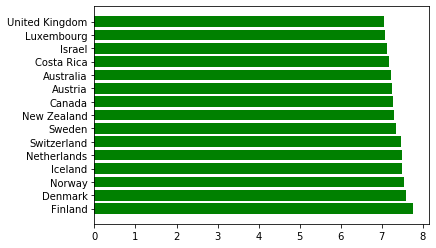

In [5]:
y= a['Score'] 
x= a['Country or region']
plt.barh(x,y,color ='g') #plot the graph after labeling x and y axis


<BarContainer object of 15 artists>

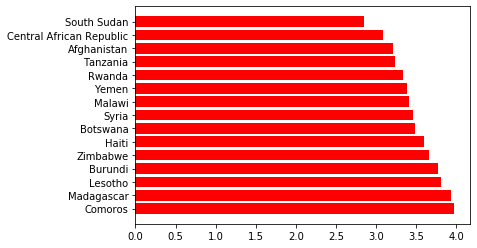

In [6]:
y= b['Score']
x= b['Country or region']
plt.barh(x,y,color ='r')

In [7]:
data.isnull()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False


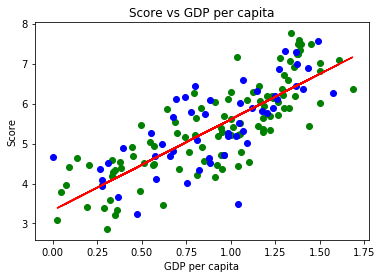

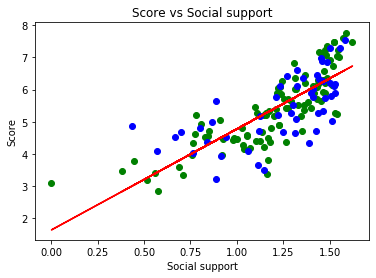

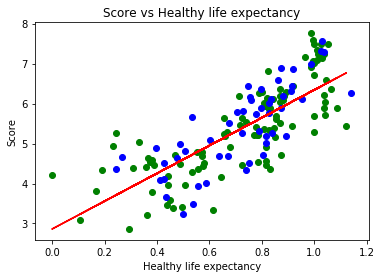

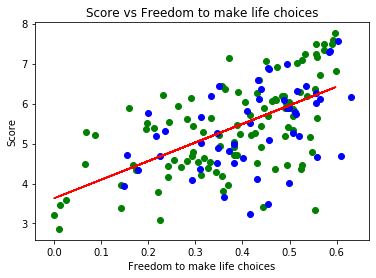

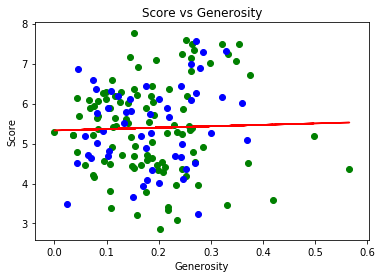

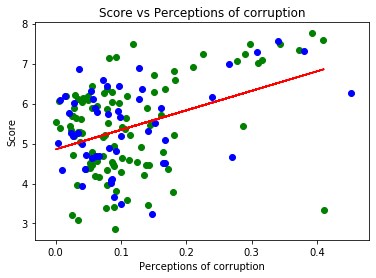

In [8]:

for i in range(3,len(data.columns)):
    y = data.iloc[:,2].values
    x = data.iloc[:,i].values
    x_name = data.columns[i]
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)

    y_pred = regressor.predict(x_test)
    x_pred=regressor.predict(x_train)

    #training values
    plt.scatter(x_train,y_train,color="green")
    
    #test values
    plt.scatter(x_test,y_test,color="blue")
    
    plt.plot(x_train,x_pred,color="red")
    plt.title("Score vs {}".format(x_name))
    plt.xlabel(x_name)
    plt.ylabel("Score")
    plt.show()

([], <a list of 0 Text yticklabel objects>)

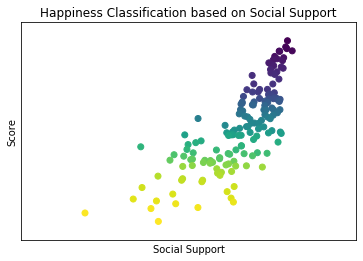

In [9]:
y = data.iloc[:,2].values
x = data.iloc[:,4].values
countries = data.iloc[:,0].values

x_min,x_max = x.min() - .5,x.max() + .5
y_min, y_max=y.min() - .5,y.max() + .5
plt.figure()
plt.title("Happiness Classification based on Social Support")
plt.scatter(x,y,c=countries)
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils
from sklearn import preprocessing

np.random.seed(0)

y = data.iloc[:,2].values
x = data.iloc[:,4].values
x = x.reshape(-1,1)

i = np.random.permutation(len(y))#blends elements of the dataset 
y = np.round(y)#rounds the prdicted output to an integer

y_train = y[i[:-10]]
x_train = x[i[:-10]]
y_test = y[i[-10:]]
x_test = x[i[-10:]]

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.predict(x_test)
knn.predict([[0.191]])

array([3.])